# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [12]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()


In [3]:
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape


(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [14]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [6]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [7]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [8]:
print(boston.target.shape)

(506,)


In [9]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [10]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

(-0.3883046085868116, 1.1739870821941207e-19)

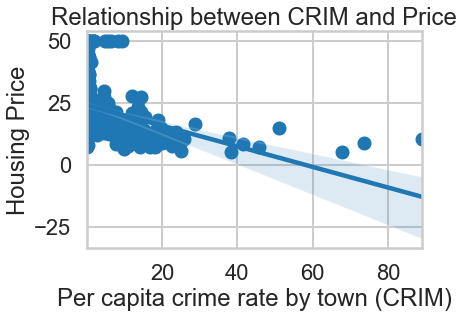

In [66]:
plt.scatter(bos.CRIM, bos.PRICE)
sns.regplot(x='CRIM',y='PRICE',data = bos)

plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
stats.pearsonr(bos.CRIM,bos.PRICE)


<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

(-0.3883046085868116, 1.1739870821941207e-19)

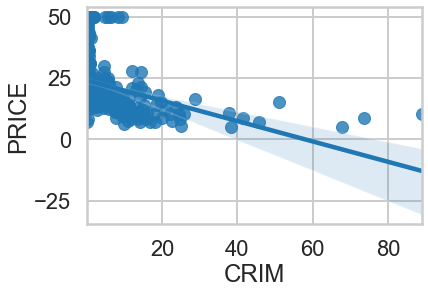

In [616]:
# your turn: describe relationship
sns.regplot(x='CRIM',y='PRICE',data = bos)
stats.pearsonr(bos.CRIM,bos.PRICE)




the pearson_coefficient shows a week negatice relation between the crime rate and house price. The probibility that 
there is no relation is very small. This means that crime rate does have some influence on the house price

(0.6953599470715395, 2.4872288710071593e-74)

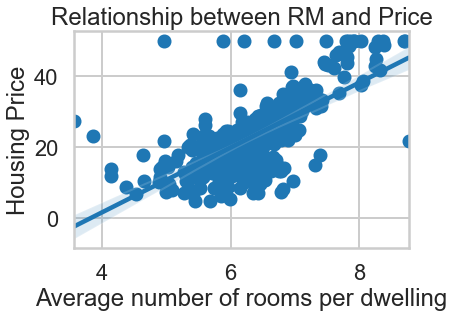

In [52]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM,bos.PRICE)
sns.regplot(x='RM',y='PRICE',data=bos)

plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
stats.pearsonr(bos.RM,bos.PRICE)

some what strong positive correlation between rm and price, 0.70 and probability of no correlatio is very small, so rm and price are positvely correlated

(-0.5077866855375619, 1.609509478472518e-34)

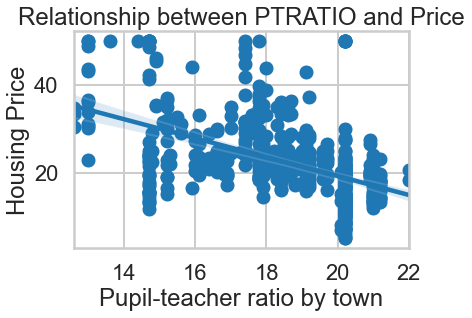

In [53]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO,bos.PRICE)
sns.regplot(x='PTRATIO',y='PRICE',data=bos)
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
stats.pearsonr(bos.PTRATIO,bos.PRICE)


ptratio is some what positively correlated to price, 0.51, with a very small prob that there is no correlation

(0.33346081965706637, 1.3181127340752416e-14)

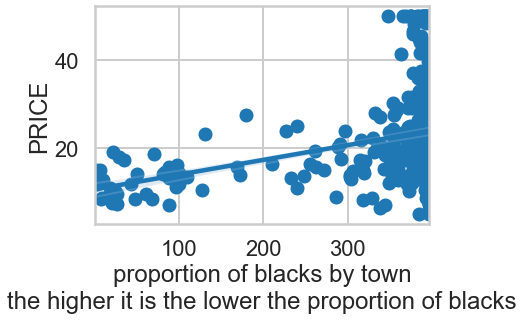

In [621]:
# your turn: create some other scatter plots
plt.scatter(bos.B,bos.PRICE)

sns.regplot(x='B',y='PRICE',data=bos)
plt.xlabel('proportion of blacks by town\nthe higher it is the lower the proportion of blacks')

stats.pearsonr(bos.B,bos.PRICE)

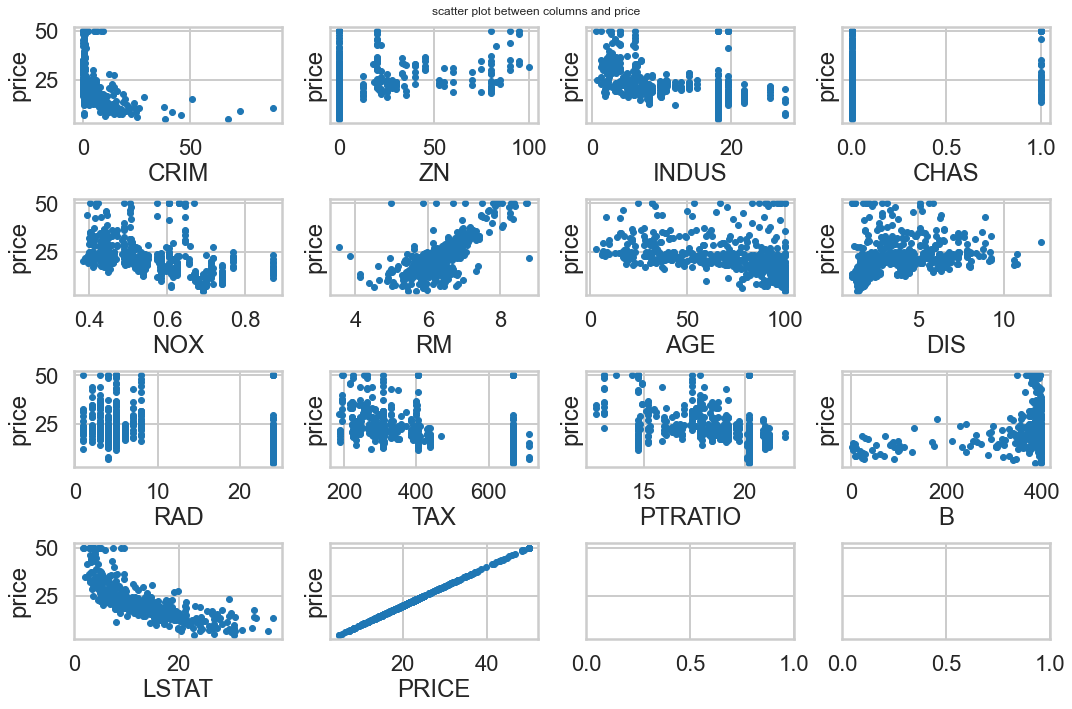

In [62]:
fig,axes = plt.subplots(4,4, figsize=(15,10),sharey=True)
fig.suptitle('scatter plot between columns and price',)
axes = axes.ravel()

for i,c in enumerate(bos.columns):
    axes[i].plot(bos[c],bos.PRICE,marker='.',linestyle='none')
    axes[i].set_ylabel('price')
    axes[i].set_xlabel(c)
plt.tight_layout()


week positive correlation

(0.6953599470715395, 2.4872288710071593e-74)

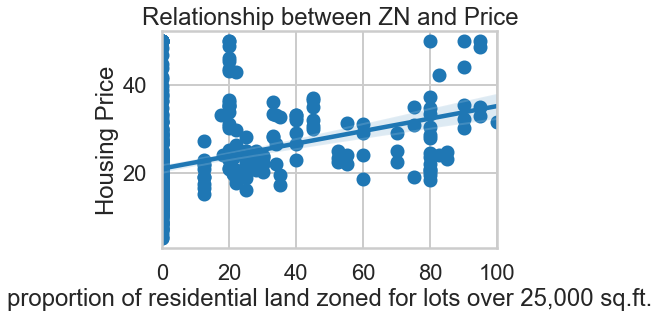

In [622]:
plt.scatter(bos.ZN,bos.PRICE)
sns.regplot(x='ZN',y='PRICE',data=bos)

plt.xlabel("proportion of residential land zoned for lots over 25,000 sq.ft.")
plt.ylabel("Housing Price")
plt.title("Relationship between ZN and Price")
stats.pearsonr(bos.RM,bos.PRICE)

In [ ]:
positively correlated, pearson coefficient = 0.7

Text(0.5, 0, 'distribution of river var')

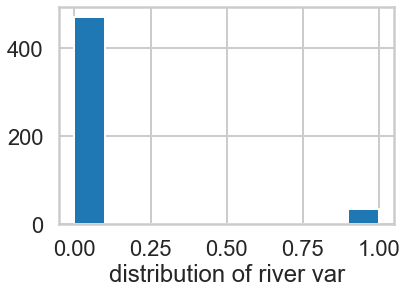

In [75]:
# Charles River dummy variable (= 1 if tract bounds river)This is a discreet variable
plt.hist(bos.CHAS)
plt.xlabel('distribution of river var')

<AxesSubplot:>

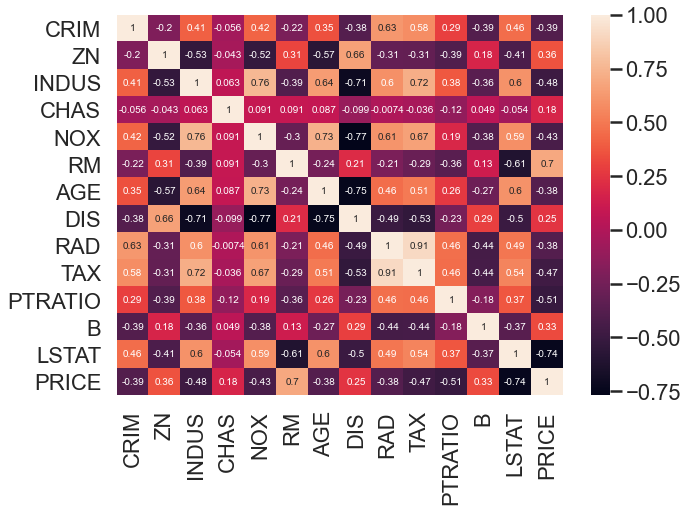

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(bos.corr(),annot=True)

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

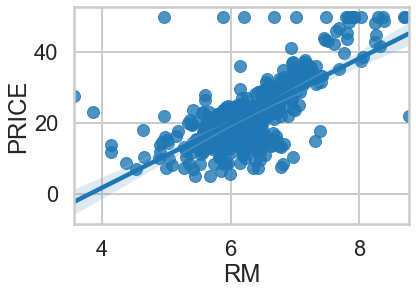

In [73]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

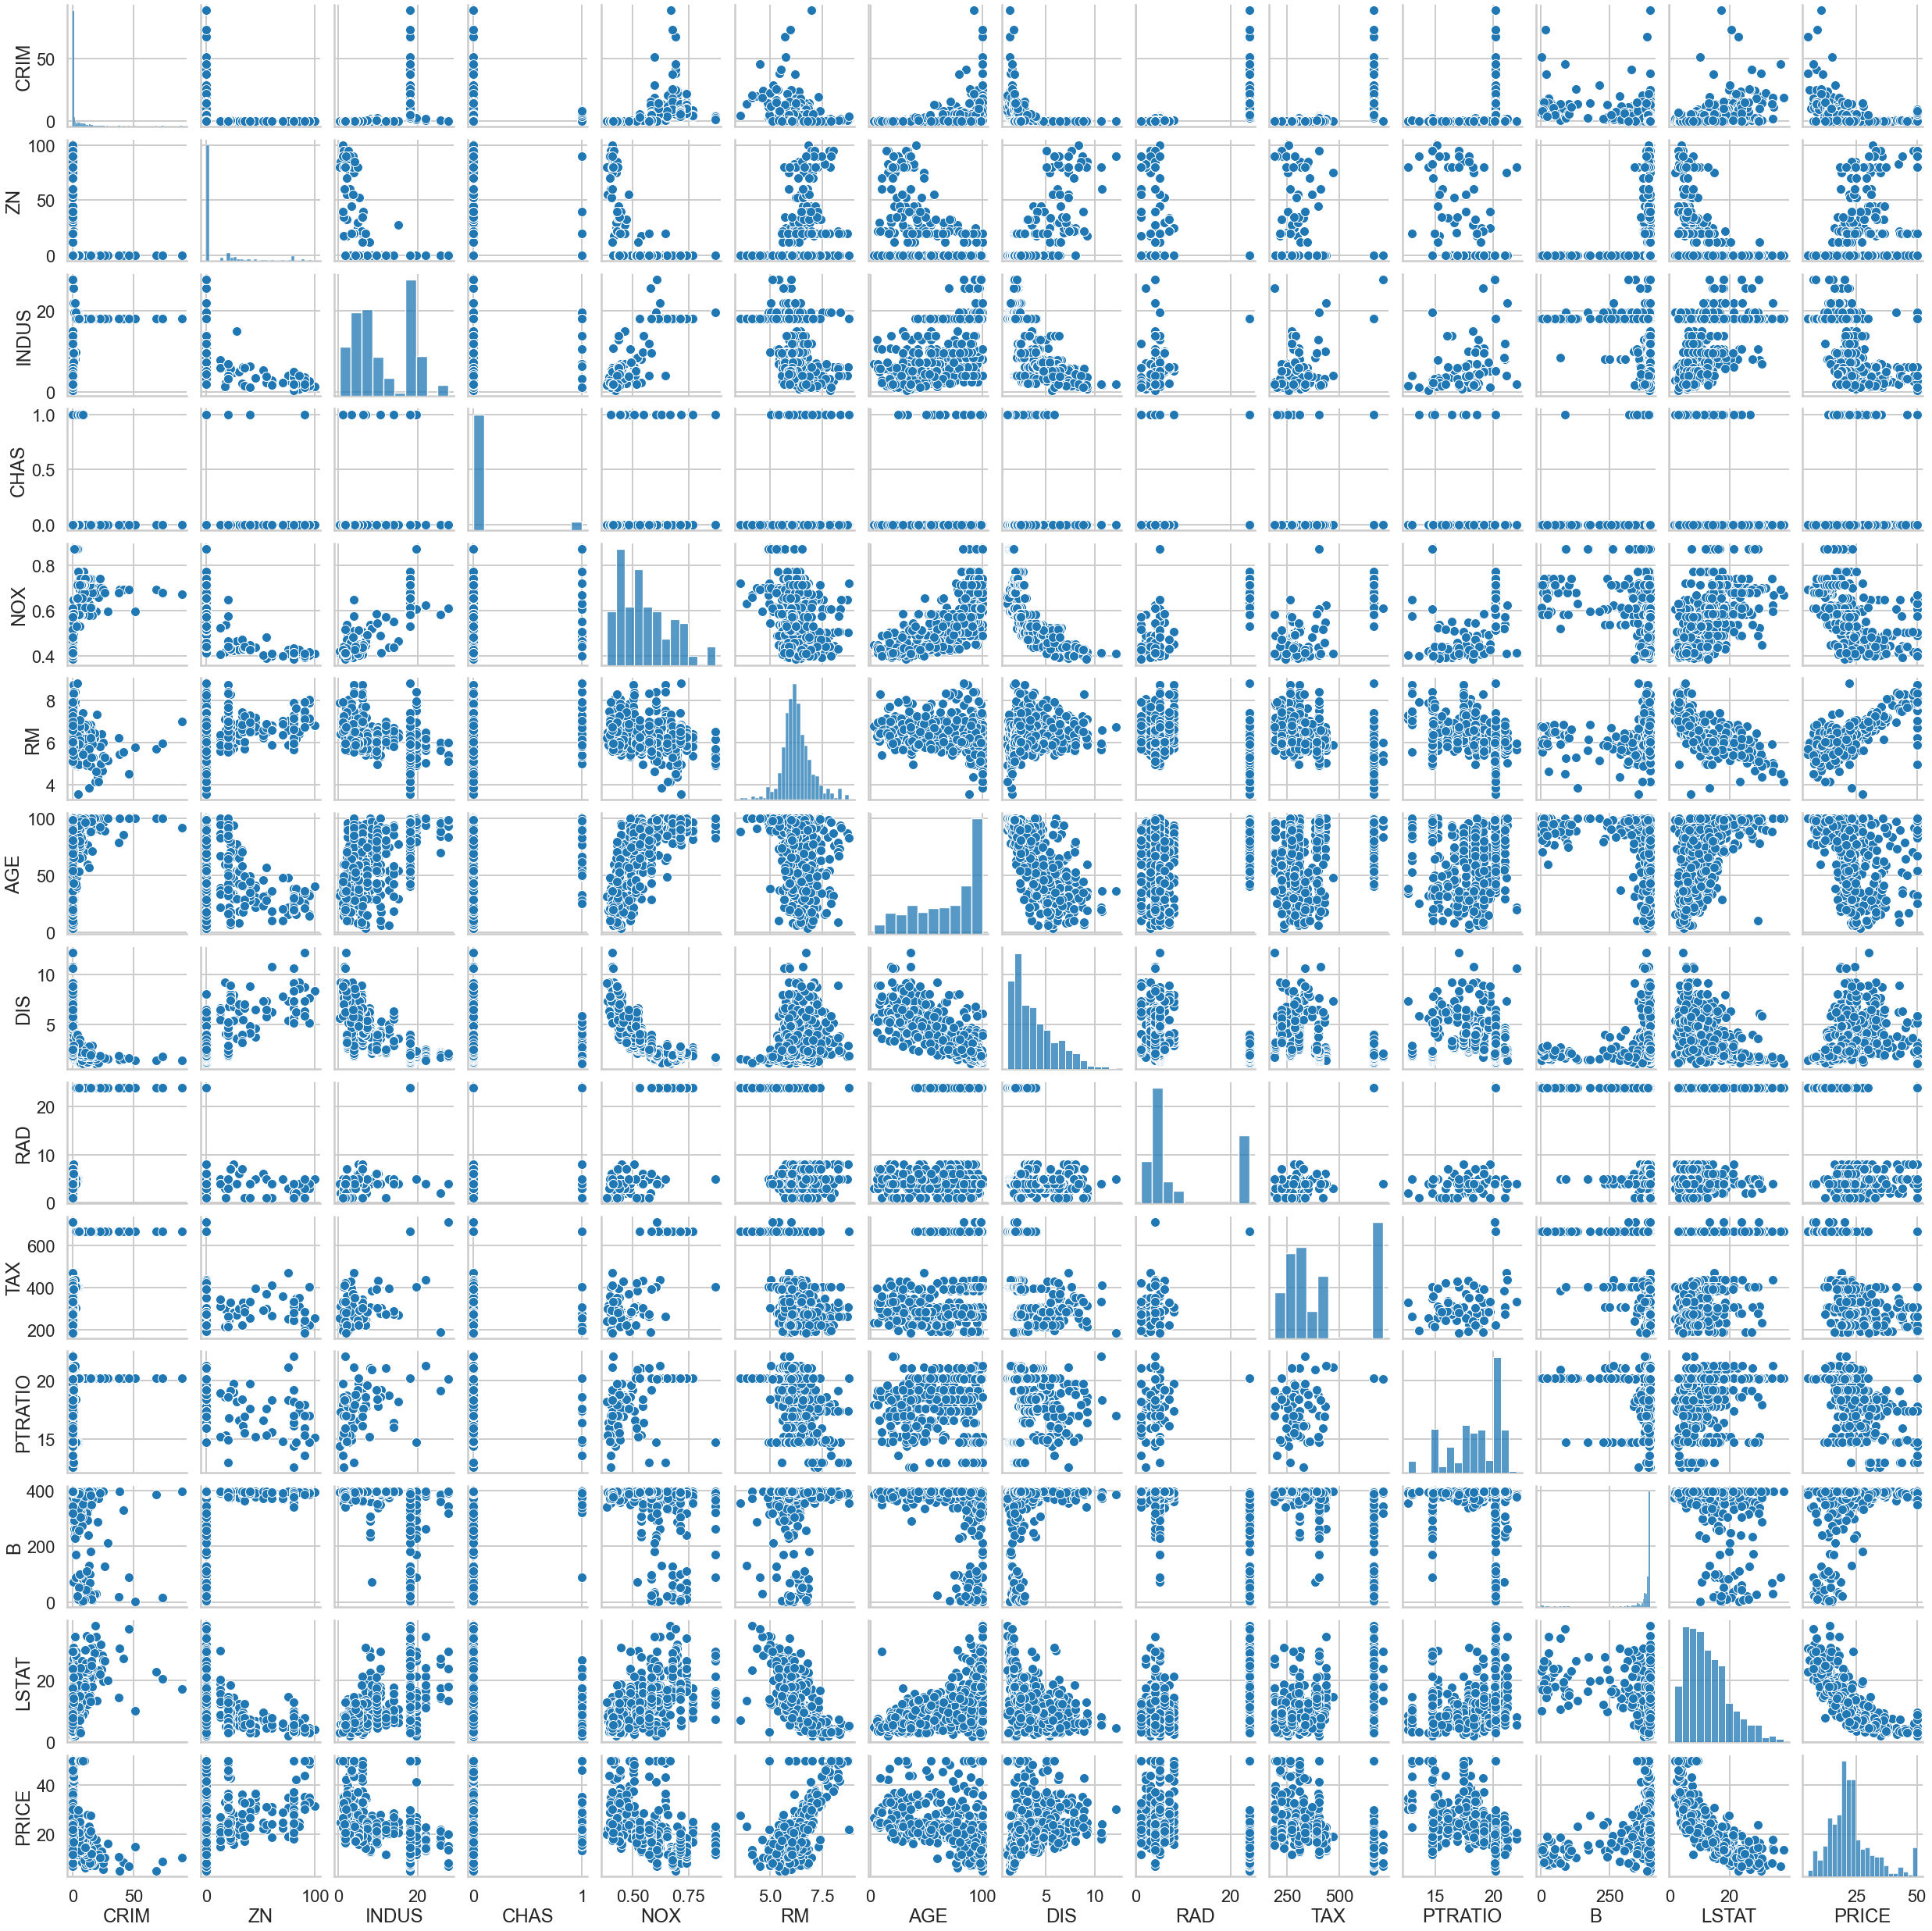

In [74]:
sns.pairplot(bos)

### Histograms
***


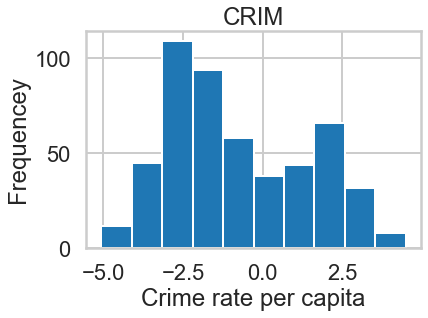

In [72]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

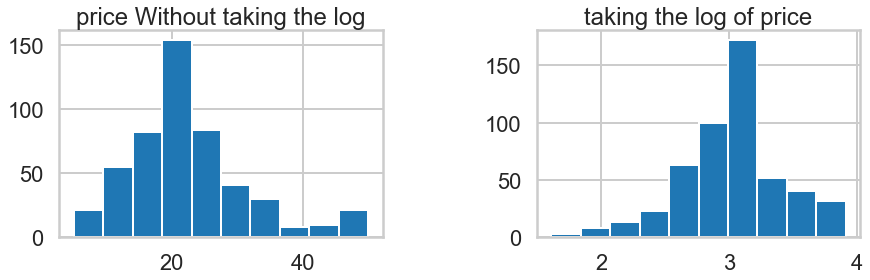

In [105]:
#hist of the target var (price)
plt.subplot(1,2,1)
plt.hist(bos.PRICE)
plt.title('price Without taking the log')
plt.subplot(1,2,2)
plt.hist(np.log(bos.PRICE))
plt.title('taking the log of price')
plt.tight_layout()
plt.subplots_adjust(right = 2)

In [ ]:
Taking the log of price makes the spread of data more normal

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

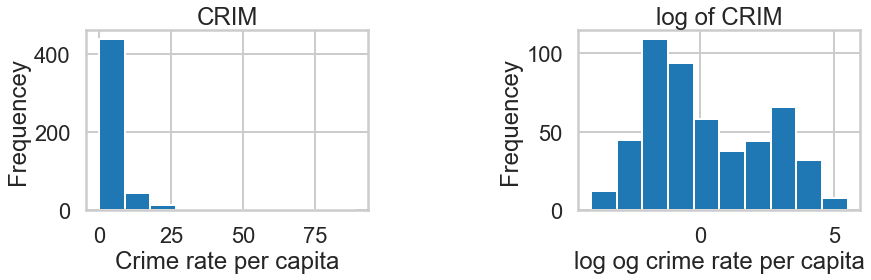

In [640]:
#your turn
plt.subplot(1,2,1)
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.subplot(1,2,2)
plt.hist(np.log(bos.CRIM))
plt.title("log of CRIM")
plt.xlabel("log og crime rate per capita")
plt.ylabel("Frequencey")

plt.tight_layout()
plt.subplots_adjust(right = 2)

#taking the log spreads out the distribution more, now it is bimodal, so taking the log might not be the best solution


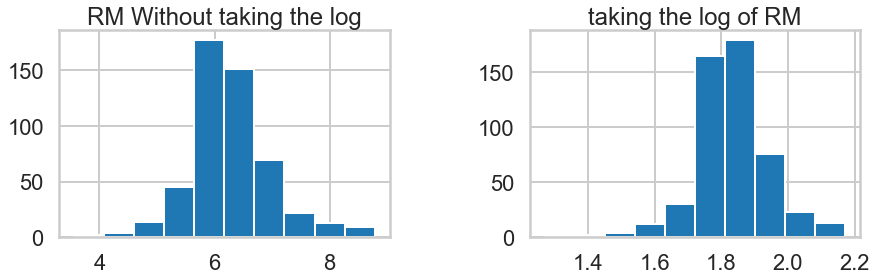

In [104]:
#RM
plt.subplot(1,2,1)
plt.hist(bos.RM)
plt.title('RM Without taking the log')
plt.subplot(1,2,2)
plt.hist(np.log(bos.RM))
plt.title('taking the log of RM')
plt.tight_layout()
plt.subplots_adjust(right = 2)
#taking the log makes the RM distribution more normal

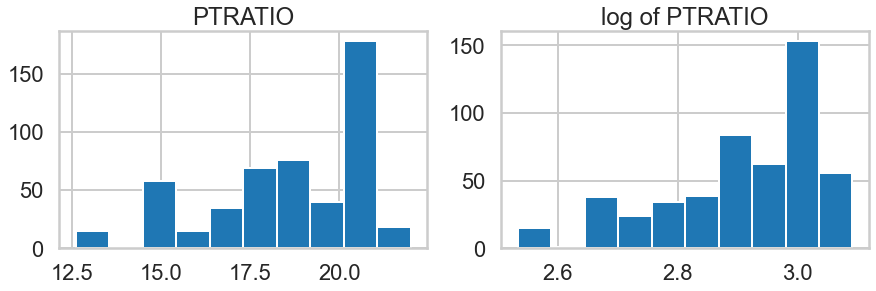

In [106]:
#PTRATIO
plt.subplot(1,2,1)
plt.hist(bos.PTRATIO)
plt.title('PTRATIO')
plt.subplot(1,2,2)
plt.hist(np.log(bos.PTRATIO))
plt.title('log of PTRATIO')
plt.subplots_adjust(right=2)
#taking the log of PTRATIO has no effect on distribution

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [107]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Users/Rime/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/Rime/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [659]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           2.49e-74
Time:                        11:55:33   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

In [660]:
#predict prices using only RM
m.fittedvalues[:5]

0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
dtype: float64

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

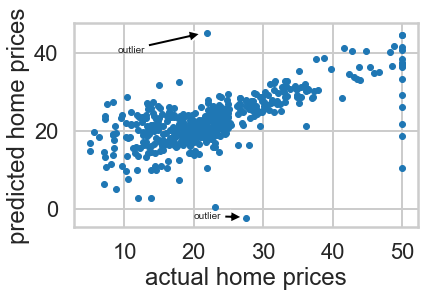

In [681]:
# your turn
plt.plot(bos.PRICE,m.fittedvalues, linestyle='none',marker='.')
#sns.regplot(x='PRICE',y=m.fittedvalues,data=bos)
plt.xlabel('actual home prices')
plt.ylabel('predicted home prices')
plt.annotate('outlier',xy=(21,45),xytext=(9,40),arrowprops={'facecolor':"black"})
plt.annotate('outlier',xy=(27,-2),xytext=(20,-2.5),arrowprops={'facecolor':"black"})

plt.tight_layout()


there is funnel at the beggining of graph, and there seems to be a pattern at 50, looking at df it seems that this dataset caped the prices at 50. Also, there are a few outliers in the set

In [644]:
bos[bos.PRICE>= 50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


In [694]:
#fit a linear regression model using statsmodel with all 13 features
m2 = ols('PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B',bos).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     89.01
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          4.90e-115
Time:                        12:55:43   Log-Likelihood:                -1548.6
No. Observations:                 506   AIC:                             3123.
Df Residuals:                     493   BIC:                             3178.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.6526      5.368      3.848      0.000      10.106      31.199
CRIM          -0.1599      0.036     -4.467      0.000      -0.230      -0.090
ZN             0.0389      0.015      2.573      0.010       0.009       0.069
INDUS         -0.0279      0.068     -0.413      0.680      -0.161       0.105
CHAS           3.2166      0.948      3.393      0.001       1.354       5.079
NOX          -20.4846      4.201     -4.877      0.000     -28.738     -12.231
RM             6.1231      0.389     15.731      0.000       5.358       6.888
AGE           -0.0459      0.014     -3.356      0.001      -0.073      -0.019
DIS           -1.5549      0.220     -7.077      0.000      -1.987      -1.123
RAD            0.2816      0.073      3.852      0.000       0.138       0.425
TAX           -0.0117      0.004     -2.832      0.005      -0.020      -0.004
PTRATIO       -1.0142      0.144     -7.040      0.000      -1.297      -0.731
B              0.0136      0.003      4.657      0.000       0.008       0.019
==============================================================================
Omnibus:                      267.269   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2542.250
Skew:                           2.108   Prob(JB):                         0.00
Kurtosis:                      13.139   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 = 0.68, so the model explains 68% of the variability of the predicted values
INDUS is not significant, meaning the prob that its coefficient=0 is 0.6 which is not statistically significant so it has no effect on the price and it can be removed from the model.

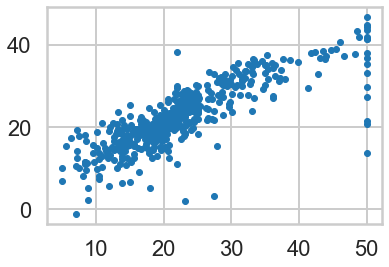

In [695]:
plt.plot(bos.PRICE, m3.fittedvalues,linestyle='none',marker='.')

In [696]:
#now lets try removing INDUS from the formula
m3 = ols('PRICE ~ CRIM + ZN  + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B',bos).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     103.7
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          1.32e-114
Time:                        12:56:00   Log-Likelihood:                -1554.5
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     495   BIC:                             3177.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8463      5.416      3.849      0.000      10.206      31.487
CRIM          -0.1671      0.036     -4.634      0.000      -0.238      -0.096
ZN             0.0396      0.015      2.609      0.009       0.010       0.069
NOX          -20.1528      4.076     -4.945      0.000     -28.160     -12.145
RM             6.2262      0.387     16.074      0.000       5.465       6.987
AGE           -0.0445      0.014     -3.220      0.001      -0.072      -0.017
DIS           -1.5648      0.217     -7.220      0.000      -1.991      -1.139
RAD            0.3093      0.071      4.377      0.000       0.170       0.448
TAX           -0.0136      0.004     -3.621      0.000      -0.021      -0.006
PTRATIO       -1.0629      0.144     -7.401      0.000      -1.345      -0.781
B              0.0142      0.003      4.835      0.000       0.008       0.020
==============================================================================
Omnibus:                      283.375   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2899.566
Skew:                           2.249   Prob(JB):                         0.00
Kurtosis:                      13.830   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

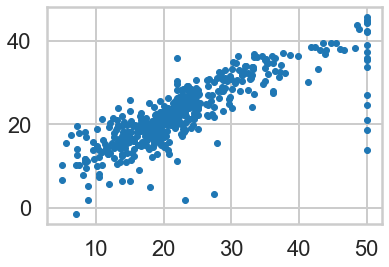

In [697]:
plt.plot(bos.PRICE, m3.fittedvalues,linestyle='none',marker='.')

no great change between m2 and m3, m3 still has the same outliers and all the prices at 50 are in a straight line

### Fitting Linear Regression using `sklearn`


In [396]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
#LinearRegression.tab


#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [391]:
# Look inside lm object

#lm.<tab>
lm.rank_

13

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [398]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [402]:
print('extimated intercept coefficient(B0):{0}'.format(lm.intercept_))


extimated intercept coefficient(B0):36.45948838508963


In [363]:
#make a df for coef
pd.DataFrame(zip(X.columns,lm.coef_),columns = ['features','estmated coeff'])

,features,estmated coeff
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


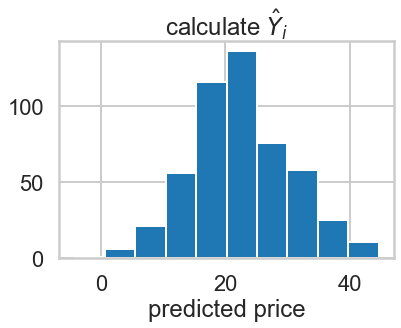

In [414]:
#calculate $Y^$
plt.hist(lm.predict(X))
plt.xlabel('predicted price')
plt.title('calculate $\hatY_i$');

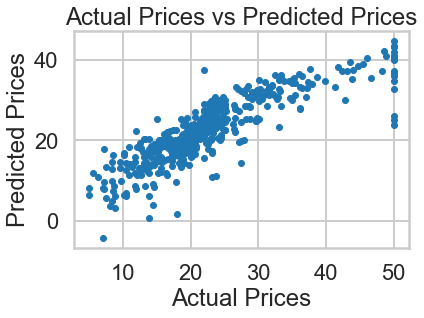

In [701]:
plt.plot(y,lm.predict(X),linestyle = 'none',marker='.')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title('Actual Prices vs Predicted Prices');

In [380]:
#calculate residual sum of squares(RSS)
rss = np.sum((y-lm.predict(X))**2)
rss

11078.784577954979

In [418]:
#calculate mean square error
mse = np.mean((y-lm.predict(X))**2)
mse

21.89483118172922

In [ ]:
model still has outliers like the stats model

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [705]:
# your turn
#it makes more sense for the intercept to be 0, because when all the features = 0, then house price should equal 0
X = bos.drop('PRICE',axis=1)
#setting the intercept to 0
lm2 = LinearRegression(fit_intercept = False)

In [706]:
lm2.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [707]:
lm2.score(X,bos.PRICE),lm.score(X,bos.PRICE)
#coefficient of determination for the model with intercept is higher than the one with intercept=0, 
#also the R^2 is higher than the statsmodel

(0.7137381380515405, 0.7406426641094094)

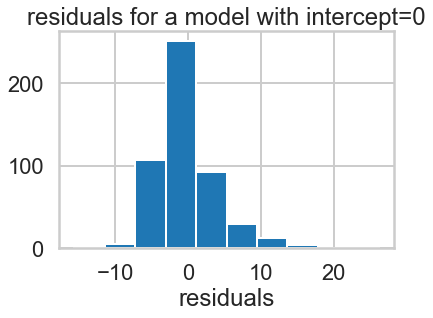

In [708]:
residuals = y - lm.predict(X)
resid_no_int= y - lm2.predict(X)

plt.hist(residuals)
plt.xlabel('residuals')
plt.title('residuals for a model with intercept=0');

Text(0.5, 1.0, 'rediduals from linear model with intercept = 0')

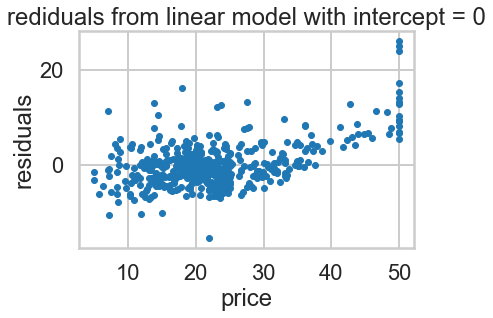

In [702]:

plt.plot(y,residuals,marker='.',linestyle='none')
plt.xlabel('price')
plt.ylabel('residuals')
plt.title('rediduals from linear model with intercept = 0')
#residuals are independent and identically distributed

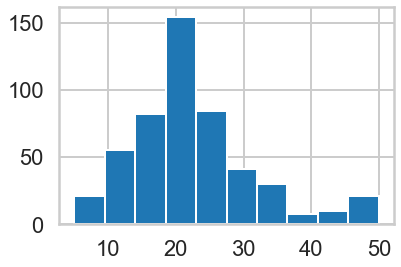

In [425]:
plt.hist(y);
#price is right skewed with a long right tail 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [167]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838508963


In [168]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [215]:
# first five predicted prices
pred = lm.predict(X)
pred[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

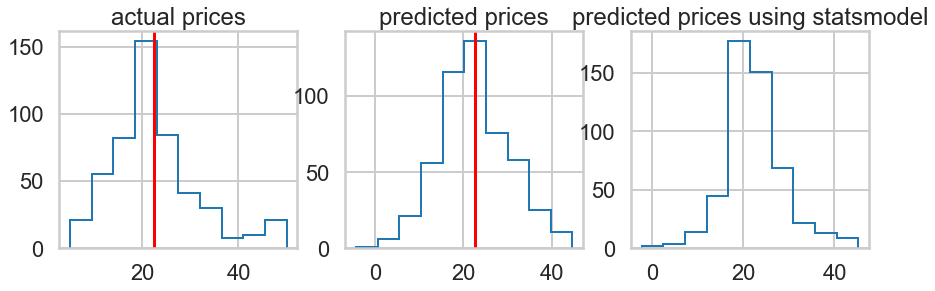

In [228]:
# your turn
#hist of predicted values
plt.subplot(1,3,1)
plt.hist(bos.PRICE, histtype='step')
plt.axvline(bos.PRICE.mean(),c='r')
plt.title('actual prices')
plt.subplot(1,3,2)
plt.hist(lm.predict(X),histtype='step')
plt.axvline(np.mean(lm.predict(X)),c='r')
plt.title('predicted prices')
plt.subplot(1,3,3)
plt.hist(m.fittedvalues,histtype='step')
plt.title('predicted prices using statsmodel')
plt.subplots_adjust(right=2)

In [202]:
np.mean(lm.predict(X)), bos.PRICE.mean(),np.std(lm.predict(X)), bos.PRICE.std()

(22.532806324110673, 22.532806324110698, 7.907257740483509, 9.19710408737982)

In [698]:
#range of predicted prices
np.abs(np.max(lm.predict(X)))-np.abs(np.min(lm.predict(X)))


40.39177267812846

In [208]:
#range of actual prices
np.abs(np.max(bos.PRICE))-np.abs(np.min(bos.PRICE))

45.0

The distribution of the predicted values is unimodal and looks like they are normally distributed, the data of the predicted values is less spread out with a std = 7.9, as opposed to 9.2, and with a smaller range. There is still a negative predicted number which doesn't make sense for a house price. 

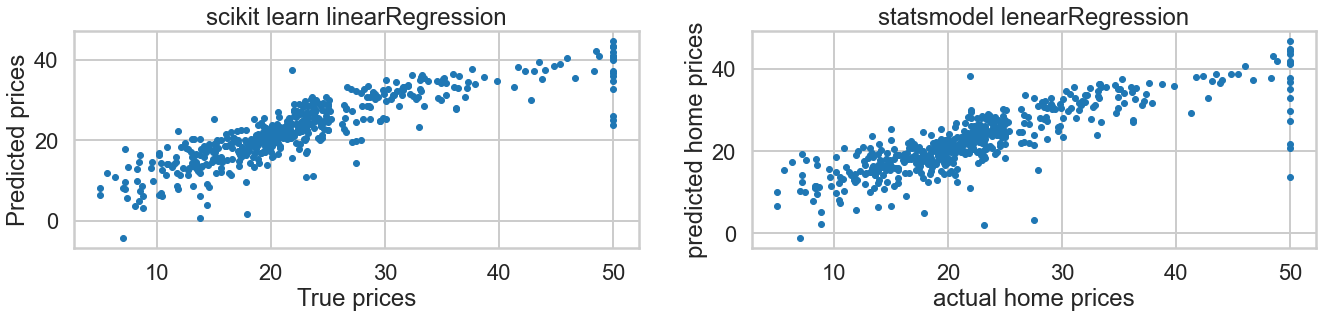

In [700]:
#scatter plot of actual against predicted
plt.subplot(1,2,1)
plt.plot(bos.PRICE,pred, linestyle='none',marker='.')
#sns.regplot(x=bos.PRICE,y=pred)
plt.xlabel('True prices')
plt.ylabel('Predicted prices')
plt.title('scikit learn linearRegression')

plt.subplot(1,2,2)
plt.plot(bos.PRICE,m2.fittedvalues, linestyle='none',marker='.')
#sns.regplot(x=m.fittedvalues,y=pred)
plt.xlabel('actual home prices')
plt.ylabel('predicted home prices')
plt.title('statsmodel lenearRegression')
plt.subplots_adjust(right=3)


The predicted data using the scikit learn model is more linear and not as pread out as the statsmodel data, there are some predicted prices that are negative in both models

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [760]:
#calculate R^2 manually

rss,ess,tss
r_sq = 1-(rss/tss)
#compare with lm score
r_sq,lm.score(X,y)


(0.7406426641094095, 0.7406426641094094)

#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

In [758]:
#calculate mse and f
mse = rss/(len(X)-len(X.columns) -1)
msr = ess / (len(X.columns))
f_stat = msr/mse
f_stat,(lm.score(X,y)/(1-lm.score(X,y)))*((len(X)-len(X.columns)-1)/len(X.columns))


(108.07666617432622, 108.0766661743262)

In [509]:
1-stats.f.cdf(108,(len(X)-len(X.columns)),(len(X.columns)-1))

4.131373021465379e-11

In [470]:
from sklearn.feature_selection import f_regression

In [752]:
f, p =f_regression(X,y,center=True)
f

array([ 89.48611476,  75.2576423 , 153.95488314,  15.97151242,
       112.59148028, 471.84673988,  83.47745922,  33.57957033,
        85.91427767, 141.76135658, 175.10554288,  63.05422911,
       601.61787111])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [486]:
# your turn
X_pt = bos[['PTRATIO']]
y=bos.PRICE
lm3 = LinearRegression().fit(X_pt,y)
lm3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [487]:
lm3.intercept_,lm3.coef_

(62.344627474832635, array([-2.1571753]))

In [480]:
lm3.score(X_pt,y)

#the linear model explain only 25% of the data

0.2578473180092231

In [488]:
pred_lm3 = lm3.predict(X_pt)

In [489]:
model_ols = ols('PRICE ~ PTRATIO',bos).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           1.61e-34
Time:                        11:21:39   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [491]:
rss = np.sum((bos.PRICE - pred_lm3) ** 2)
ess = np.sum((pred_lm3-np.mean(bos.PRICE))**2)
tss = rss+ess
rss,ess,tss
r_sq = 1-rss/tss
mse = rss / (len(X_pt)-len(X_pt.columns)-1)
msr = ess / len(X_pt.columns)
f_calc = msr / mse
f_calc
#same stat as in summary

175.10554287569522

In [493]:

#f_regression calculates ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y))
f_stat, p=f_regression(X_pt,y,center=True)
f_stat,p
#the p_value is very small which means it is statistically significant, thus the linear model with ptratio is a better 
#model than the model with only the intercept as the a variable

(array([175.10554288]), array([1.60950948e-34]))

In [495]:
#compute the ANOVA 
from sklearn.feature_selection import f_classif
f_classif(X,y)

(array([3.41392257, 1.69825318, 2.15122   , 1.1023291 , 2.33899533,
        2.6759978 , 2.32954454, 1.50668687, 1.91464853, 2.21005614,
        1.77625065, 1.81833191, 5.75215088]),
 array([3.96011747e-22, 1.33848202e-05, 6.92548118e-10, 2.19230914e-01,
        9.79460688e-12, 4.61825642e-15, 1.21443705e-11, 5.71935357e-04,
        1.34226572e-07, 1.83137289e-10, 2.63568318e-06, 1.07802131e-06,
        2.98266767e-41]))

In [286]:
#f-test of overall significance assesses all of the coefficients jointly whereas the t-test for each 
#coefficient examines them individually
stats.ttest_ind(X,y)
#here also we find that the p_value for using ptratio is significant which means we can reject the H0 that the model 
#without ptratio is a better model

Ttest_indResult(statistic=array([-9.70695961]), pvalue=array([2.3325897e-21]))

For a simple regression model, when f_statistic is significant, usually the t_statistic will be significant also

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [496]:
# your turn
X_crp= bos[['CRIM','RM','PTRATIO']]
lm4 = LinearRegression().fit(X_crp,y)
lm4

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [497]:
lm4.score(X_crp,y)
#better thatn just usig ptratio which gave a coefficient of determination of 0.26

0.5943412940723471

In [499]:
#f_stat
f_regression(X_crp,y)
#p_values are significant

(array([ 89.48611476, 471.84673988, 175.10554288]),
 array([1.17398708e-19, 2.48722887e-74, 1.60950948e-34]))

In [505]:
f_stat_all,p_all = f_regression(X,y)
len(f_stat_all)

13

In [507]:
t_stat_all,pt_all = stats.ttest_ind(X,y)
t_stat_all

array([-33.79596814, -10.02156125, -22.34170939, -54.92102897,
       -53.75019652, -39.6246115 ,  34.97390495, -44.67323653,
       -23.0598939 ,  51.40301009,  -9.70695961,  81.9155443 ,
       -19.08625489])

In [343]:
data = {'f_stat_all':f_stat_all,'p_all':p_all,'t_stat_all':t_stat_all,'pt_all':pt_all}
stats_df = pd.DataFrame(data=data,index = index)#,pt_all))#, columns = columns)
stats_df

,f_stat_all,p_all,t_stat_all,pt_all
CRIM,89.486115,1.173987e-19,-33.795968,4.137606e-168
ZN,75.257642,5.713584e-17,-10.021561,1.337148e-22
INDUS,153.954883,4.900260e-31,-22.341709,3.640811e-90
CHAS,15.971512,7.390623e-05,-54.921029,1.465154e-305
NOX,112.591480,7.065042e-24,-53.750197,1.624910e-298
RM,471.846740,2.487229e-74,-39.624611,6.490168e-208
AGE,83.477459,1.569982e-18,34.973905,3.209462e-176
DIS,33.579570,1.206612e-08,-44.673237,2.033628e-241
RAD,85.914278,5.465933e-19,-23.059894,7.311700e-95
TAX,141.761357,5.637734e-29,51.403010,3.613063e-284


## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [520]:
from sklearn.model_selection import train_test_split


In [764]:
#add to X
X_5var = bos[['CRIM','RM','PTRATIO','TAX','LSTAT']]
X_train,X_test,y_train,y_test= train_test_split(X_5var,y,test_size=0.3,random_state=123)
lm5 = LinearRegression().fit(X,y)
lm5
lm6=LinearRegression().fit(X_train,y_train)

In [523]:
train_pred = lm6.predict(X_train)
test_pred = lm6.predict(X_test)

In [768]:
#compare f
rss = np.sum((bos.PRICE - lm.predict(X)) ** 2)
ess = np.sum((lm.predict(X)-np.mean(bos.PRICE))**2)
tss = rss+ess

rss_r = rss = np.sum((bos.PRICE - lm5.predict(X)) ** 2)

f = (rss_r - rss/((len(X)-5-1)-(len(X)-13-1)))/(rss/(len(X)-13-1))
f

430.5

In [769]:
#calculate f_stat for lm6 with training data
rss = np.sum((y_train - train_pred) ** 2)
ess = np.sum((train_pred-np.mean(y_train))**2)
tss = rss+ess
rss,ess,tss
r_sq = 1-rss/tss
mse = rss / (len(X)-len(X_5var.columns)-1)
msr = ess / len(X_5var.columns)
f_calc = msr / mse
r_sq,f_calc


(0.7269621435259828, 266.24957905614144)

In [527]:
#calculate f_stat for lm6 with testing data 

rss = np.sum((y_test - test_pred) ** 2)
ess = np.sum((test_pred-np.mean(y_test))**2)
tss = rss+ess
rss,ess,tss
r_sq = 1-rss/tss
mse = rss / (len(X_5var)-len(X_5var.columns)-1)
msr = ess / len(X_5var.columns)
f_calc = msr / mse
r_sq,f_calc

(0.6147081166963213, 159.5434898408752)

In [ ]:
from sklearn.metrics import mean_squared_error

In [557]:
print('mean squared error using X_train: ',np.mean((y_train - lm5.predict(X_train))**2))
print('mean squared error using X_test(using 5 features): ',np.mean((y_test - lm5.predict(X_test))**2))
print('mean squared error using X_pt(only PTRATIO): ',np.mean((y - lm3.predict(X_pt))**2))
print('mean squared error using X_crp: ',np.mean((y - lm4.predict(X_crp))**2))

print('mean squared error using X: ',mean_squared_error(y, lm.predict(X)))


mean squared error using X_train:  23.423096410183955
mean squared error using X_test(using 5 features):  35.773934717411215
mean squared error using X_pt(only PTRATIO):  62.65220001376925
mean squared error using X_crp:  34.24552790529692
mean squared error using X:  21.894831181729206


the model that includes all the features has a lower mse

In [541]:
from statsmodels.tools.eval_measures import aic

In [542]:
aic(y_train,len(X_train),len(X_5var.columns))

273   -60.4
52    -40.0
181   -62.4
452   -22.2
381   -11.8
       ... 
98    -77.6
476   -23.4
322   -30.8
382   -12.6
365   -45.0
Name: PRICE, Length: 354, dtype: float64

In [544]:
aic(y,len(X),len(X.columns))

0     -22.0
1     -17.2
2     -43.4
3     -40.8
4     -46.4
       ... 
501   -18.8
502   -15.2
503   -21.8
504   -18.0
505     2.2
Name: PRICE, Length: 506, dtype: float64

In [ ]:
rss_r = np.sum((y_test - test_pred) ** 2) - 
f_stat_r = ((rss_r - rss_f)/(df_r - df_f))/(ess_f/df_f)


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [583]:
# Your turn.
m = ols('PRICE ~ RM',bos)
m_fit = m.fit()
m_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           2.49e-74
Time:                        15:11:58   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [588]:
m_pred = m_fit.predict()
m_pred[:5],m_fit.fittedvalues[:5]

(array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211]),
 0    25.175746
 1    23.774021
 2    30.728032
 3    29.025938
 4    30.382152
 dtype: float64)

Text(0, 0.5, 'residuals')

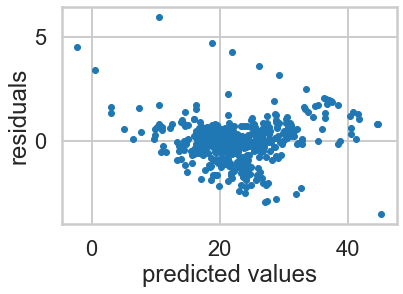

In [575]:
plt.plot(m_fit.fittedvalues,m_fit.resid_pearson,linestyle='none',marker='.')
plt.xlabel('predicted values')
plt.ylabel('residuals')
#there is no pattern for predicted values vs. residuals

Most of the residuals cluster around zero, however there are a few outliers where the model predicted values predicted values are far from actual
There seems to be a few outliers where the predicted value was large and the residual was very negative

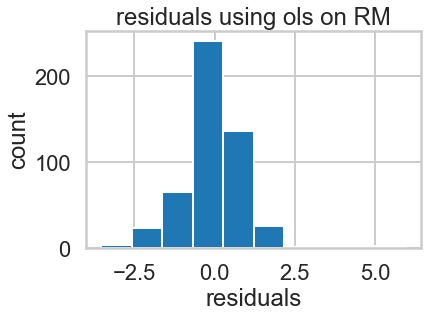

In [579]:
plt.hist(m_fit.resid_pearson)
plt.xlabel('residuals')
plt.ylabel('count')
plt.title('residuals using ols on RM');
#residuals look normal

In [593]:
#outliers. There are some outliers on the scatter plot, investigate one
#outlier for residual > 5
np.where(m_fit.resid_pearson > 5)

(array([368]),)

In [599]:
y[368],m_fit.fittedvalues[368]
#the model under predicted by almost 40 points

(50.0, 10.566860860027553)

In [602]:
#another weirdness is that there is a negative number predicted
np.where(m_fit.fittedvalues<0)

(array([365]),)

In [605]:
m_fit.fittedvalues[365],y[365]

(-2.2580106944555, 27.5)

the model also predicted a negative number which does not make sense for a home price

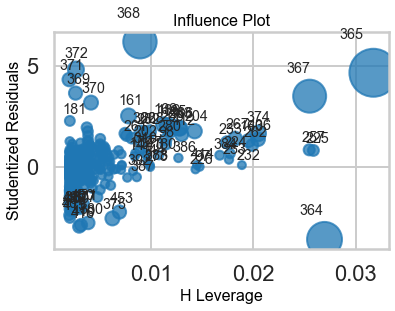

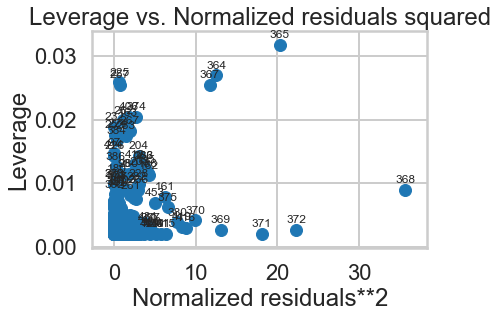

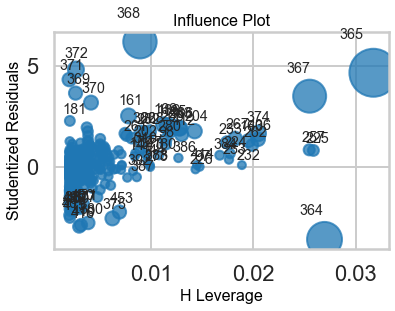

In [615]:
#from statsmodels.graphics.regressionplots import *

sm.graphics.plot_leverage_resid2(m_fit)

sm.graphics.influence_plot(m_fit)

In [613]:
m_fit.resid_pearson[368]

5.960125001768428

In [803]:
bos_modified = bos[['RM','PRICE']]
bos_modified = bos_modified.drop(365)
bos_modified = bos_modified.drop([364,367,368])


In [806]:
m_rm = ols('PRICE ~ RM', bos_modified).fit()
m_rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     646.4
Date:                Fri, 22 Jan 2021   Prob (F-statistic):           3.84e-92
Time:                        18:19:34   Log-Likelihood:                -1614.8
No. Observations:                 502   AIC:                             3234.
Df Residuals:                     500   BIC:                             3242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.6074      2.535    -16.415      0.000     -46.587     -36.627
RM            10.1828      0.401     25.425      0.000       9.396      10.970
==============================================================================
Omnibus:                       45.509   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.857
Skew:                           0.150   Prob(JB):                     6.67e-49
Kurtosis:                       6.243   Cond. No.                         60.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coefficient of determination is better

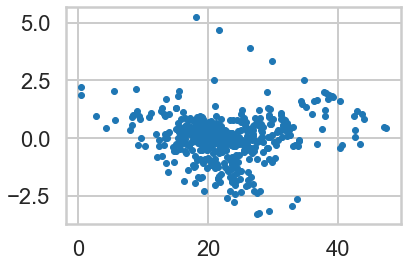

In [807]:
plt.plot(m_rm.fittedvalues,m_rm.resid_pearson,linestyle='none',marker='.')
